In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv("../dataset/phoenix_train.csv")
test_data = pd.read_csv("../dataset/phoenix_test.csv")

train_data

,F72,F25,F65,F68,F101,F104,F105,F15-NA,F15-private,F15-protected,...,F71-maryannxue@apache.org,F71-jzhong@JZhongs-MacBook-Pro.local,F71-elilevine@apache.org,F71-stoens@apache.org,F71-gabrielr@ngdata.com,F71-rajeshbabu@apache.org,F71-ramkrishna.s.vasudevan@gmail.com,F71-mujtaba@apache.org,F71-wei.xue@intel.com,label
0,0.745370,0.810767,0.015,0.010870,0.065327,0.206702,0.344086,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.637037,0.678630,0.050,0.070652,0.029263,0.141916,0.815694,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.637037,0.678630,0.050,0.070652,0.028801,0.141916,0.631387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.637037,0.678630,0.050,0.070652,0.021643,0.141916,0.815694,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.637037,0.678630,0.050,0.070652,0.021181,0.141916,0.631387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,0.828704,0.928222,0.040,0.038043,0.059509,0.067668,0.662105,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2231,0.828704,0.928222,0.030,0.038043,0.067118,0.137772,0.662105,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2232,0.828704,0.928222,0.030,0.038043,0.074212,0.137772,0.493157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2233,0.828704,0.928222,0.030,0.038043,0.095495,0.137772,0.493157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
feature_columns = ['F72', 'F25', 'F65', 'F68', 'F101', 'F104', 'F105', 'F15-NA',
       'F15-private', 'F15-protected', 'F15-public', 'F22', 'F123', 'F77',
       'F41', 'F126']

X_train = train_data[feature_columns]
y_train = train_data['label']

X_test = test_data[feature_columns]
y_test = test_data['label']

In [4]:
# Logistic Regression Model

logistic_model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# GridSearchCV for hyperparameter tuning
grid_search_logistic = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_logistic.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression: ", grid_search_logistic.best_params_)


Best parameters for Logistic Regression:  {'C': 10, 'solver': 'liblinear'}


In [5]:
# Predict on the test data
y_pred_logistic = grid_search_logistic.predict(X_test)
y_proba_logistic = grid_search_logistic.predict_proba(X_test)[:, 1]

# Evaluation Metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("AUC Score:", roc_auc_score(y_test, y_proba_logistic))

Logistic Regression Metrics:
Accuracy: 0.8501465048137296
Precision: 0.4
Recall: 0.08746355685131195
F1 Score: 0.14354066985645933
AUC Score: 0.7067576926036439


In [6]:
# Support Vector Machine Model

svm_model = SVC(probability=True)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1')

grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


In [7]:
y_pred_svm = grid_search_svm.predict(X_test)
y_proba_svm = grid_search_svm.predict_proba(X_test)[:, 1]

print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_proba_svm))

SVM Metrics:
Accuracy: 0.8752616157388029
Precision: 0.7472527472527473
Recall: 0.19825072886297376
F1 Score: 0.31336405529953915
AUC Score: 0.7216812154271008


In [8]:
# Random Forest Model

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1')

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [9]:
y_pred_rf = grid_search_rf.predict(X_test)
y_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest Metrics:
Accuracy: 0.8777731268313101
Precision: 0.8311688311688312
Recall: 0.18658892128279883
F1 Score: 0.3047619047619048
AUC Score: 0.8918432894733093


In [10]:
# Compare the models
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]
precisions = [
    precision_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_rf)
]
recalls = [
    recall_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_rf)
]
f1_scores = [
    f1_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_rf)
]
auc_scores = [
    roc_auc_score(y_test, y_proba_logistic),
    roc_auc_score(y_test, y_proba_svm),
    roc_auc_score(y_test, y_proba_rf)
]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC Score': auc_scores
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.850147,0.400000,0.087464,0.143541,0.706758
1,SVM,0.875262,0.747253,0.198251,0.313364,0.721681
2,Random Forest,0.877773,0.831169,0.186589,0.304762,0.891843


In [11]:
results_df.to_csv('eva_phoenix.csv', index=False)

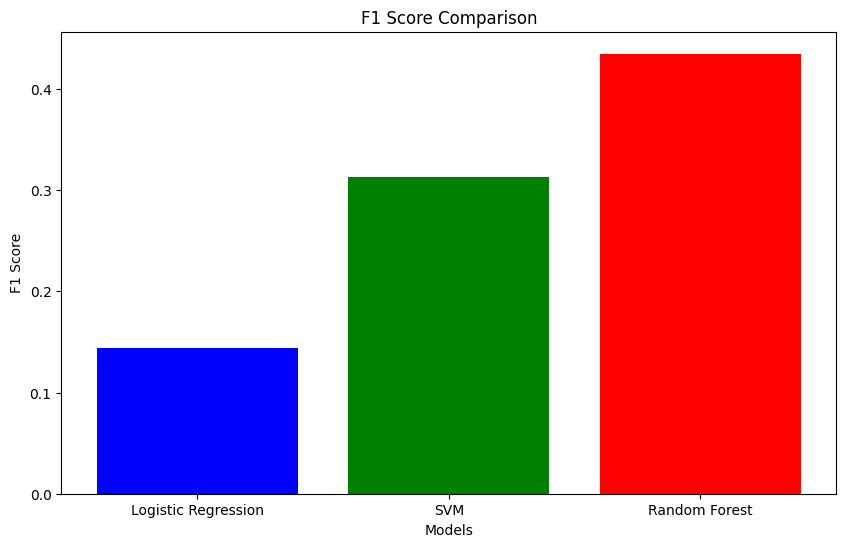

In [11]:
# Plotting the F1 Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.title('F1 Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

In [12]:
from sklearn.ensemble import VotingClassifier

base_models = [
    ('logistic', grid_search_logistic.best_estimator_),
    ('svm', grid_search_svm.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

# Hard Voting Classifier (majority voting)
hard_voting_clf = VotingClassifier(estimators=base_models, voting='hard')
hard_voting_clf.fit(X_train, y_train)

# Predict using hard voting (class predictions)
y_pred_hard_voting = hard_voting_clf.predict(X_test)

# Metrics for Hard Voting 
print("Hard Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_hard_voting))
print("Precision:", precision_score(y_test, y_pred_hard_voting))
print("Recall:", recall_score(y_test, y_pred_hard_voting))
print("F1 Score:", f1_score(y_test, y_pred_hard_voting))
print("AUC Score: Not available for hard voting\n")

# Soft Voting Classifier (average probabilities)
soft_voting_clf = VotingClassifier(estimators=base_models, voting='soft')
soft_voting_clf.fit(X_train, y_train)

# Predict and evaluate soft voting (probabilities are available)
y_pred_soft_voting = soft_voting_clf.predict(X_test)
y_proba_soft_voting = soft_voting_clf.predict_proba(X_test)[:, 1]

print("Soft Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_soft_voting))
print("Precision:", precision_score(y_test, y_pred_soft_voting))
print("Recall:", recall_score(y_test, y_pred_soft_voting))
print("F1 Score:", f1_score(y_test, y_pred_soft_voting))
print("AUC Score:", roc_auc_score(y_test, y_proba_soft_voting))


Hard Voting Classifier Metrics:
Accuracy: 0.8698200083717036
Precision: 0.7666666666666667
Recall: 0.13411078717201166
F1 Score: 0.228287841191067
AUC Score: Not available for hard voting

Soft Voting Classifier Metrics:
Accuracy: 0.8748430305567183
Precision: 0.8235294117647058
Recall: 0.16326530612244897
F1 Score: 0.2725060827250608
AUC Score: 0.8835970919578555


In [13]:
# Function to compute the required metrics and store the results
def store_metrics(train_data, y_test, y_proba_soft_voting, dataset_name, output_file='dataset_comparison.csv'):
    # Compute label distribution (normalized)
    label_counts = train_data['label'].value_counts(normalize=True)
    # Length of the dataset
    length = len(train_data)
    # Compute AUC score
    AUC_ensemble = roc_auc_score(y_test, y_proba_soft_voting)
    
    # Create a dictionary of results
    result = {
        'dataset': dataset_name,
        'class_0_proportion': label_counts.get(0, 0),
        'class_1_proportion': label_counts.get(1, 0),
        'dataset_size': length,
        'AUC': AUC_ensemble
    }

    # Convert the result dictionary to a DataFrame (single row)
    result_df = pd.DataFrame([result])

    # Check if the output file exists, if not create it with headers
    try:
        # Try to append to the file
        result_df.to_csv(output_file, mode='a', header=False, index=False)
    except FileNotFoundError:
        # If the file doesn't exist, create it with headers
        result_df.to_csv(output_file, mode='w', header=True, index=False)

# Example usage for a single dataset:
# Replace 'train_data', 'y_test', 'y_proba_soft_voting' with actual data

# Example:
# Assuming you have the following variables
# train_data = pd.read_csv('some_dataset.csv') # Load your train dataset
# y_test = your_test_labels
# y_proba_soft_voting = your_model_predictions_probabilities

# Store metrics for the current dataset
store_metrics(train_data, y_test, y_proba_soft_voting, dataset_name='PhoenixDataset')
